# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [3]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [5]:
# Dataset url
url = Ruta + "SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [6]:
# Print the dataframe
df.head()

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334


In [12]:
# get the number of observations and variables
Ob = df.shape[0]
Va = df.shape[1]
print("La base de datos posee un total de ", Ob ,"filas y son ", Va, "Variables.")

La base de datos posee un total de  1024 filas y son  6 Variables.


2. Drop rows with any missing values


In [15]:
# Drop rows with NaN values if existing
Nan = df.isnull().sum()

# Print the new shape
print("Nuestra base de datos no presenta observaciones vacias como se muestra en la siguiente tabla:")
print(Nan)

Nuestra base de datos no presenta observaciones vacias como se muestra en la siguiente tabla:
x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64


3. Scatterplot




Text(0.5, 1.0, 'Gráfico de Dispersión de las variables x1 & x2')

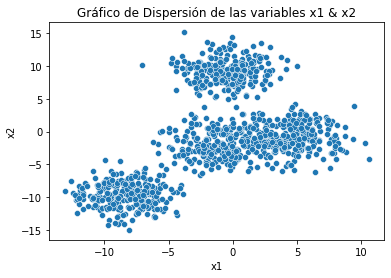

In [17]:
# Scatterplot of x1 and x2
sp1= sns.scatterplot(data=df, x="x1", y="x2")
sp1.set_title("Gráfico de Dispersión de las variables x1 & x2")

Text(0.5, 1.0, 'Gráfico de Dispersión de las variables x1 & x3')

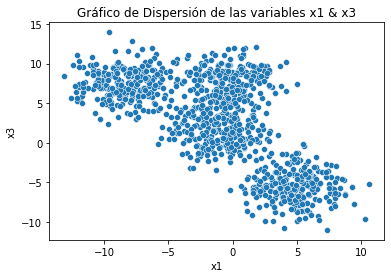

In [18]:
# Scatterplot of x1 and x3
sp2= sns.scatterplot(data=df, x="x1", y="x3")
sp2.set_title("Gráfico de Dispersión de las variables x1 & x3")

Difficult to plot independetly all combinations, let's use pairplot

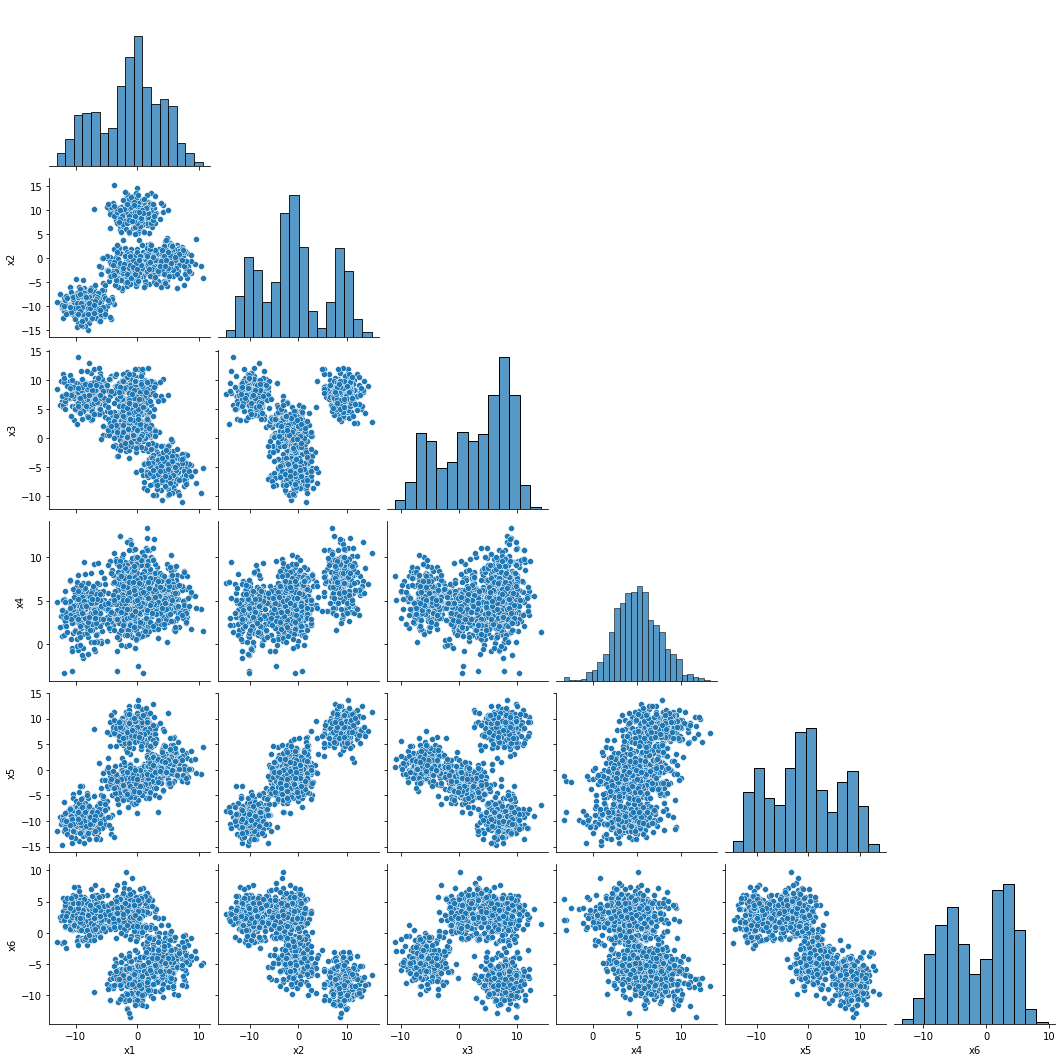

In [23]:
# Pairplot: Scatterplot of all variables
sp3= sns.pairplot(data= df, diag_kind="hist",corner=True)
sp3

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [39]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
#Let's assume there are 2,3,4,5...? clusters/groups
K  = 3

#Creat the Kmeans box
km = KMeans(n_clusters = K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)


# Print estimated cluster of each point in the dataset
yestimated

array([0, 2, 2, ..., 2, 0, 0], dtype=int32)

In [40]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated
df.head()

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,0
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,2
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,2
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,2
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,0


In [41]:
# Print the labes of the existing clusters.
df.yestimated.unique()


array([0, 2, 1], dtype=int32)

In [51]:
# Cluster centroides
ClustersC = km.cluster_centers_
ClustersC

array([[ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018,  2.97445972],
       [-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451,  3.01544402],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ,  2.        ]])

In [43]:
# Sum of squared error (sse) of the final model
km.inertia_

47109.73252701621

In [44]:
# The number of iterations required to converge
km.n_iter_

10

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

Text(0.5, 1.0, 'Gráfico de Dispersión de las variables x1 & x2, en sus agrupaciones')

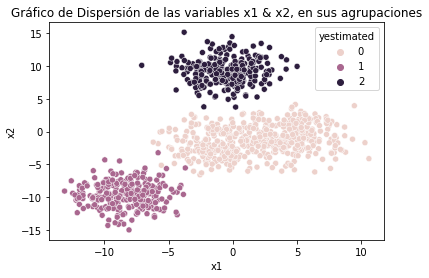

In [47]:
# Get a dataframe with the data of each cluster
df0 = df[df.yestimated == 0]
df1 = df[df.yestimated == 1]
df2 = df[df.yestimated == 2]

# Scatter plot of each cluster
sp4 = sns.scatterplot(data= df , x="x1", y="x2", hue="yestimated")
sp4.set_title("Gráfico de Dispersión de las variables x1 & x2, en sus agrupaciones")

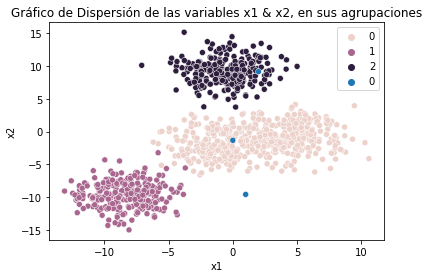

In [65]:
#plot centroide cluster
sp4 = sns.scatterplot(data= df , x="x1", y="x2", hue="yestimated")
sp4.set_title("Gráfico de Dispersión de las variables x1 & x2, en sus agrupaciones")
sp5 = sns.scatterplot(data= ClustersC[:,1:2])

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [52]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng= range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(df[["x1","x2"]])
  sse.append(km.inertia_)


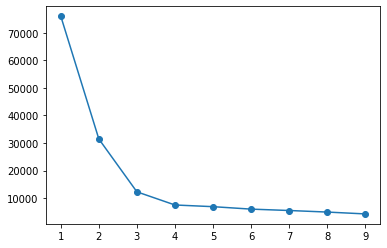

In [64]:
# Plot sse versus k
plt.plot(k_rng,sse,'o-')

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics
